In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


## Collect the Entire data of Youtube

In [121]:
import os

In [122]:
path = '/Users/shruti/Youtube sentiment Analysis /additional_data/additional_data' #imporing multiple files thorugh a path 

In [123]:
files = os.listdir(path) #extracting the files from the path

In [124]:
files

['IN_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv']

In [125]:
files_csv = [f for f in files if f.endswith('.csv')]

In [126]:
files_csv

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [127]:
files_csv[0].split('.')[0][:2]

'MX'

In [128]:
[files_csv[i].split('.')[0][:2]for i in range(0, len(files_csv))]

['MX', 'IN', 'DE', 'JP', 'KR', 'CA', 'FR', 'US', 'GB']

In [129]:
len(files_csv)

9

In [130]:
full_df = pd.DataFrame()  #combining all the data into one 

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1') # combining the path and the file name and loads it into a DataFrame. It uses 'iso-8859-1' encoding to handle any special characters in the file.
    current_df['Country'] = file.split('.')[0][:2] #creating a new column for country 
    full_df  = pd.concat([current_df, full_df])

In [131]:
full_df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,âº HOW MY RELATIONSHIP STARTED!\nâº PB Merch...,GB
6,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,GB
7,-N5eucPMTTc,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10T19:19:43.000Z,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,GB
8,LMCuKltaY3M,17.14.11,Elbow - Golden Slumbers (John Lewis Advert 2017),ElbowVEVO,10,2017-11-10T08:00:01.000Z,"Elbow|""Golden""|""Slumbers""|""Polydor""|""Alternative""",154494,2163,147,211,https://i.ytimg.com/vi/LMCuKltaY3M/default.jpg,False,False,False,"âGolden Slumbersâ, originally by The Beatl...",GB
9,9t9u_yPEidY,17.14.11,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",JenniferLopezVEVO,10,2017-11-10T15:00:00.000Z,"Jennifer Lopez ft. Wisin|""Jennifer Lopez ft. W...",9548677,190084,15015,11473,https://i.ytimg.com/vi/9t9u_yPEidY/default.jpg,False,False,False,"Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O...",GB


## Which Category has the maximum likes?

In [132]:
ca = pd.read_csv('/Users/shruti/Youtube sentiment Analysis /category_file.csv', sep=':') #using sep to import csv files without space as there is no comma seprating the columns

In [133]:
ca.head()

,"category_id,category_columns"
0,"1, Film & Animation"
1,"2, Autos & Vehicles"
2,"10, Music"
3,"15, Pets & Animals"
4,"17, Sports"


In [134]:
ca.reset_index(inplace=True)

In [135]:
ca.head()

,index,"category_id,category_columns"
0,0,"1, Film & Animation"
1,1,"2, Autos & Vehicles"
2,2,"10, Music"
3,3,"15, Pets & Animals"
4,4,"17, Sports"


In [136]:
ca.columns = ['Category_id', 'Category_name'] # assigning them column values 

In [137]:
ca.head()

,Category_id,Category_name
0,0,"1, Film & Animation"
1,1,"2, Autos & Vehicles"
2,2,"10, Music"
3,3,"15, Pets & Animals"
4,4,"17, Sports"


In [138]:
ca.set_index('Category_id',inplace=True)

In [139]:
dc = ca.to_dict() # mapping dataset into a dictionary so we can map out the column

In [140]:
dc

{'Category_name': {0: '1, Film & Animation',
  1: '2, Autos & Vehicles',
  2: '10, Music',
  3: '15, Pets & Animals',
  4: '17, Sports',
  5: '18, Short Movies',
  6: '19, Travel & Events',
  7: '20, Gaming',
  8: '21, Videoblogging',
  9: '22, People & Blogs',
  10: '23, Comedy',
  11: '24, Entertainment',
  12: '25, News & Politics',
  13: '26, Howto & Style',
  14: '27, Education',
  15: '28, Science & Technology',
  16: '29, Nonprofits & Activism',
  17: '30, Movies',
  18: '31, Anime/Animation',
  19: '32, Action/Adventure',
  20: '33, Classics',
  21: '34, Comedy',
  22: '35, Documentary',
  23: '36, Drama',
  24: '37, Family',
  25: '38, Foreign',
  26: '39, Horror',
  27: '40, Sci-Fi/Fantasy',
  28: '41, Thriller',
  29: '42, Shorts',
  30: '43, Shows',
  31: '44, Trailers            '}}

In [141]:
dc['Category_name']

{0: '1, Film & Animation',
 1: '2, Autos & Vehicles',
 2: '10, Music',
 3: '15, Pets & Animals',
 4: '17, Sports',
 5: '18, Short Movies',
 6: '19, Travel & Events',
 7: '20, Gaming',
 8: '21, Videoblogging',
 9: '22, People & Blogs',
 10: '23, Comedy',
 11: '24, Entertainment',
 12: '25, News & Politics',
 13: '26, Howto & Style',
 14: '27, Education',
 15: '28, Science & Technology',
 16: '29, Nonprofits & Activism',
 17: '30, Movies',
 18: '31, Anime/Animation',
 19: '32, Action/Adventure',
 20: '33, Classics',
 21: '34, Comedy',
 22: '35, Documentary',
 23: '36, Drama',
 24: '37, Family',
 25: '38, Foreign',
 26: '39, Horror',
 27: '40, Sci-Fi/Fantasy',
 28: '41, Thriller',
 29: '42, Shorts',
 30: '43, Shows',
 31: '44, Trailers            '}

In [142]:
full_df['Category_name'] = full_df['category_id'].map(dc['Category_name'])

In [143]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'Country', 'Category_name'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '39, Horror'),
  Text(1, 0, '37, Family'),
  Text(2, 0, '23, Comedy'),
  Text(3, 0, '30, Movies'),
  Text(4, 0, '38, Foreign'),
  Text(5, 0, '35, Documentary'),
  Text(6, 0, '36, Drama'),
  Text(7, 0, '41, Thriller'),
  Text(8, 0, '28, Science & Technology'),
  Text(9, 0, '40, Sci-Fi/Fantasy'),
  Text(10, 0, '2, Autos & Vehicles'),
  Text(11, 0, '33, Classics'),
  Text(12, 0, '10, Music'),
  Text(13, 0, '32, Action/Adventure'),
  Text(14, 0, '42, Shorts'),
  Text(15, 0, '43, Shows')])

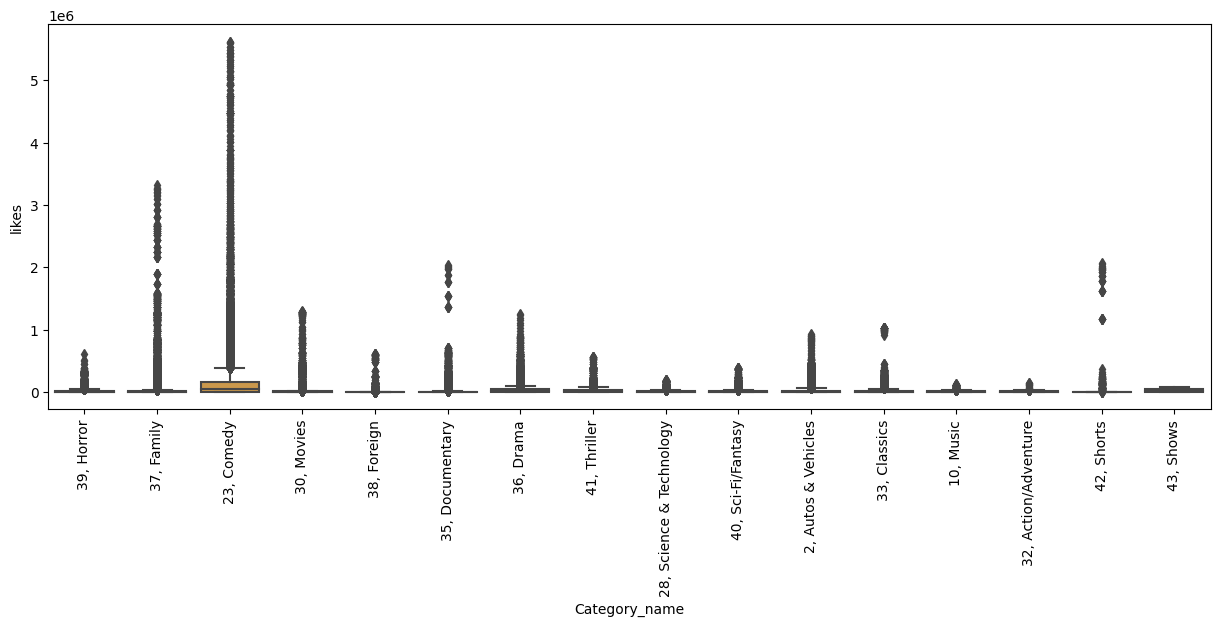

In [144]:
plt.figure(figsize=(15,5))
sns.boxplot(x=full_df['Category_name'], y=full_df['likes'])
plt.xticks(rotation='vertical')


## Analysing relationship between views and likes

<Axes: xlabel='views', ylabel='likes'>

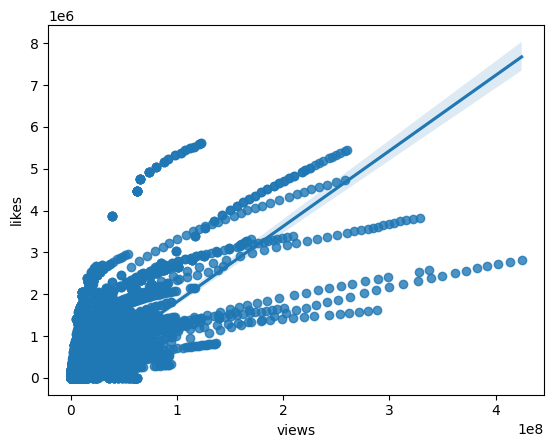

In [145]:
sns.regplot(data=full_df, x='views', y='likes')

<Axes: >

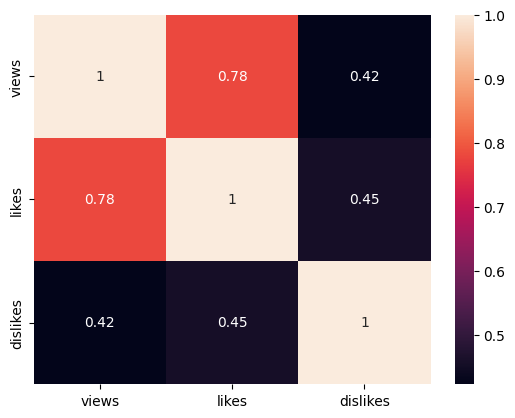

In [146]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(), annot =True)

## Which channels have the largest number of trending videos?

In [147]:
tdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [148]:
import plotly.express as px

In [149]:
tdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,802
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,742
...,...,...
31614,Yvolution,1
31615,Official - stefan2205,1
31616,YÃ¼shel ZeGerm,1
31617,YÄ°RMÄ°6 MAHSEN,1


In [150]:
px.bar(tdf[:20], x = 'channel_title', y='total_videos')

## Picking up a video for sentiment Analysis


In [151]:
df = pd.read_csv('UScomments.csv', on_bad_lines= 'skip', low_memory= False )

In [152]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [153]:
df.isna().sum()  #checking for null values 

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [154]:
df.dropna(subset='comment_text', inplace=True)  # dropping null values in the main dataset

In [155]:
df.isna().sum() #rechecking if all the null values have been dropped 

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [156]:
polarity = [] #defining a new empty list known as polarity where we will store the values of polarity and subjectivity by creating a loop
for comment in df['comment_text']: # we are running the loop for comment_text column
   polarity.append(TextBlob(comment).sentiment.polarity) # we are appending in the same table hence the use of polarity.append 

In [157]:
 df['polarity'] = polarity #adding the polarity table to the main dataframe

In [158]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## Wordcloud of your positive and negative sentences

In [159]:
comments_positve = df[df['polarity']==1] # finding all the positive comments

In [160]:
comments_negative = df[df['polarity']==-1] # finding all the negative comments 

In [161]:
 from wordcloud import WordCloud, STOPWORDS

In [162]:
 comments_positve['comment_text'] 

64                                          yu are the best
156       Power is the disease.  Care is the cure.  Keep...
227       YAS Can't wait to get it! I just need to sell ...
307                                       This is priceless
319                                     Summed up perfectly
                                ...                        
691373                               Perfect. Every version
691383                                    Me encantaaaaa <3
691388                                     Best song ever 🤘
691389                                excellent performance
691393                                                   <3
Name: comment_text, Length: 19390, dtype: object

In [163]:
total_comments = ' '.join(comments_positve['comment_text']) # converting series value into string values for further analysis 

In [164]:
total_comments[0:100]

'yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as bes'

(-0.5, 399.5, 199.5, -0.5)

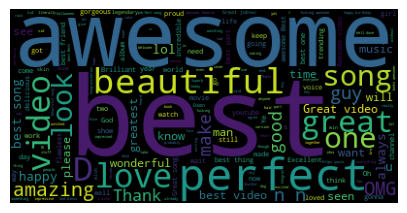

In [165]:
 wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments) #generating wordcloud for positive comments 
 plt.figure(figsize=(5,5))
 plt.imshow(wordcloud)
 plt.axis('off') #removing the axis line

In [166]:
total_comments = ' '.join(comments_negative['comment_text']) # converting all the series data into string

(-0.5, 399.5, 199.5, -0.5)

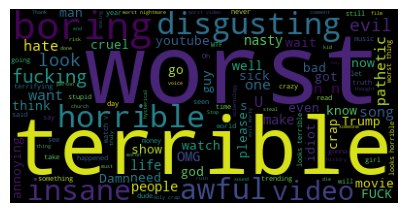

In [167]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments)  #generating wordclous for negative comments
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis('off')

## Lets Perform Emoji Analysis

In [168]:
import emoji

In [169]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [170]:
emoji_list = [] # defining a new empty list known as emoji where we are extracting all the emoji by running a loop for comment_text and extracting emoji from all the comments  
for comment in df['comment_text']:
    for char in comment: #nested for to find all the characters in comment_text
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char) #appending it in the same table

In [171]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [172]:
from collections import Counter 

In [173]:
Counter(emoji_list).most_common(5) # counting emojis and finding the top 5 emojis

[('😂', 36987), ('😍', 33453), ('❤', 31119), ('🔥', 8694), ('😭', 8398)]

In [174]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [175]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [176]:
freq = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [177]:
freq 

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]